#Разведочный анализ данных

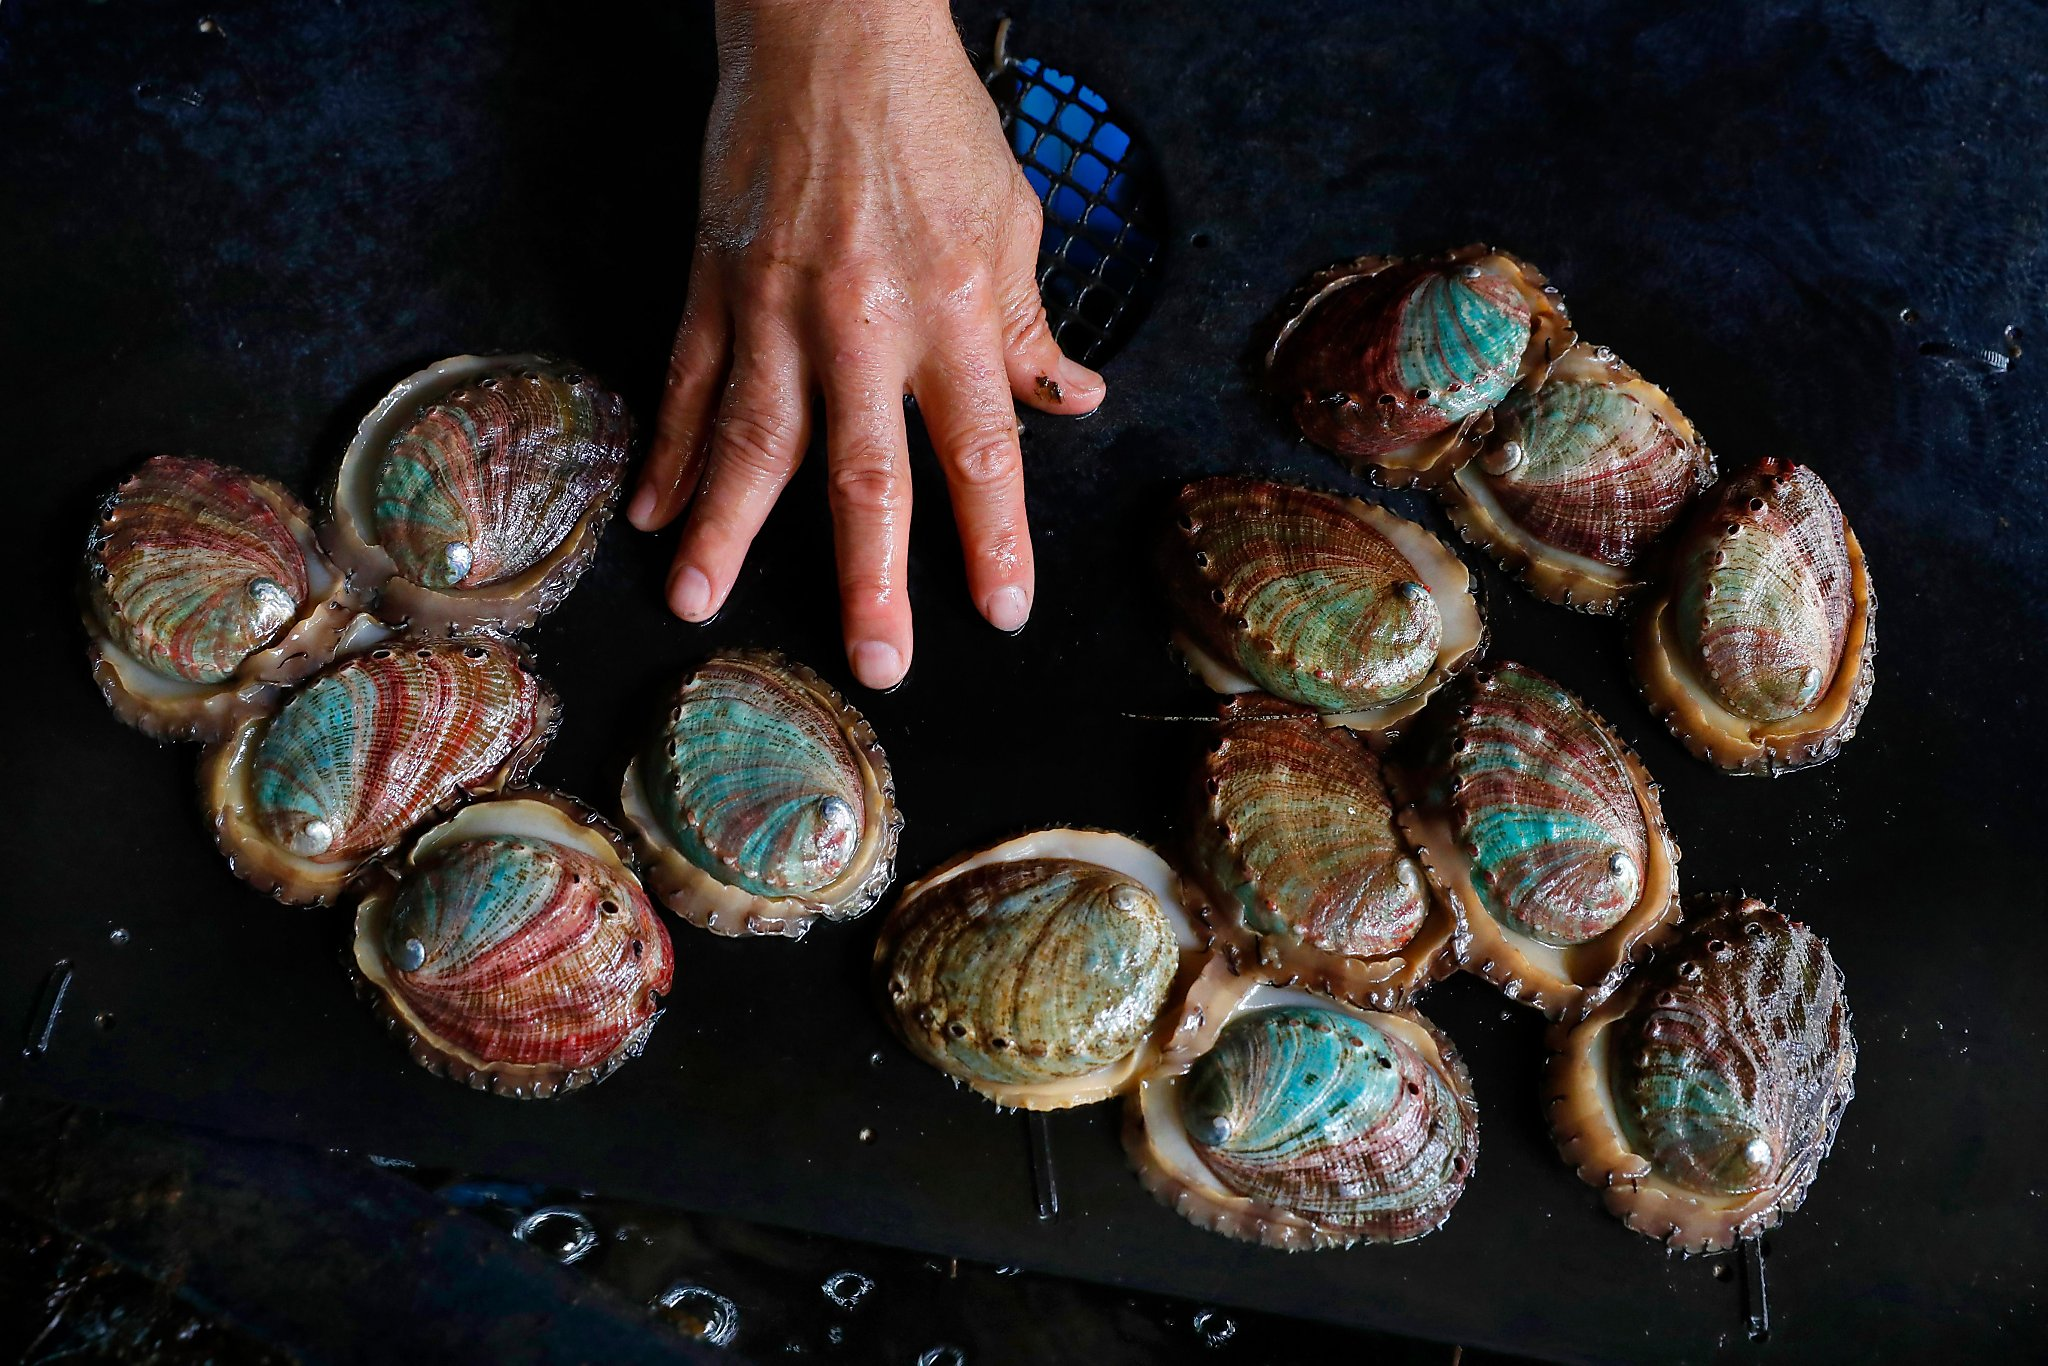

#Что это за такая "Abalone" и с чем ее едят (краткий ликбез)

Морски́е у́шки, или галиотисы (лат. Haliotis),  — род брюхоногих моллюсков из подкласса Vetigastropoda, выделяемый в собственное семейство Haliotidae.

Раковина напоминает по форме человеческое ухо с маленьким, плоским завитком сбоку на заднем конце. Средние размеры галиотисов составляют 5—7 см, но представители отдельных видов достигают 35 см в длину.

Насчитывают 51 вид. Большинство видов галиотисов обитает в тропических и субтропических водах, некоторые встречаются и в умеренных водах Тихого и Атлантического океанов.

Некоторые виды морских ушек употребляются в пищу, для их ловли приходится опускаться на значительную глубину. Наиболее активно морское ушко употребляют в пищу в Японии и Китае.

Раковины галиотиса имеют коммерческую ценность: из них изготовляют украшения и декоративные предметы.

##Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/abalone.csv')

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


##Описание данных

**Predict the age of abalone from physical measurements**

**Sex** - nominal - M, F, and I (infant)

**Length** - continuous - mm - Longest shell measurement

**Diameter** - continuous - mm - perpendicular to length

**Height** - continuous - mm - with meat in shell

**Whole weight** - continuous - grams - whole abalone

**Shucked weight** - continuous - grams - weight of meat

**Viscera weight** - continuous - grams - gut weight (after bleeding)

**Shell weight** - continuous - grams - after being dried

**Rings** - integer - +1.5 gives the age in years (target)

Размер датасета

In [4]:
df.shape

(4177, 9)

Информация о типах данных и пропусках

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Основные числовые характеристики

In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4078.000000,4177.000000,4078.000000,4177.000000,4177.000000,4127.000000,4177.000000
mean,0.523992,0.407840,0.139516,0.827306,0.359367,0.180594,0.239072,9.933684
std,0.120093,0.099286,0.041827,0.490348,0.221963,0.109614,0.138942,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.440500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.150875,0.502000,0.253000,0.328250,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
df.describe(include='object')

,Sex
count,4177
unique,4
top,M
freq,1447


In [8]:
# В поле Sex явно что-то не так с количеством уникальных значений. Позже с этим разберемся.
df.Sex.value_counts()

M    1447
I    1276
F    1259
f     195
Name: Sex, dtype: int64

In [9]:
# Повторяющиеся строки в датасете отсутствуют
df.duplicated().sum()

0

##Работа с пропущенными значениями

In [10]:
# В целом, пропусков в данных не так много. Можно заполнить медианными значениями.
df.isnull().mean() * 100

Sex               0.000000
Length            0.000000
Diameter          2.370122
Height            0.000000
Whole weight      2.370122
Shucked weight    0.000000
Viscera weight    0.000000
Shell weight      1.197031
Rings             0.000000
dtype: float64

In [11]:
median_diameter = df['Diameter'].median()

df['Diameter'].fillna(median_diameter, inplace=True)

In [12]:
median_whole_weight = df['Whole weight'].median()

df['Whole weight'].fillna(median_whole_weight, inplace=True)

In [13]:
median_shell_weight = df['Shell weight'].median()

df['Shell weight'].fillna(median_shell_weight, inplace=True)

In [14]:
# Убедимся, что пропусков больше нет
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

##Однофакторный анализ

In [15]:
# Дальше для удобства работы приведем названия колонок к нижнему регистру и заменим пробелы на нижнее подчеркивание
df.columns = df.columns.str.replace(' ','_').str.lower()

In [16]:
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')

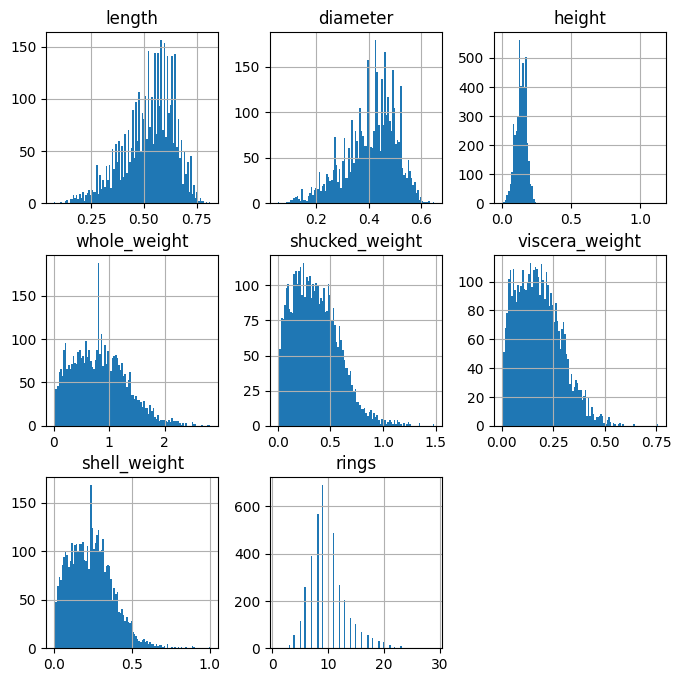

In [17]:
df.hist(bins=100, figsize=(8,8));

###Sex

In [18]:
# Исправляем ошибочные значения
df.sex = df.sex.replace('f', 'F')

In [19]:
# Можно считать, что дисбаланса классов в нашем датасете нет
df.sex.value_counts()

F    1454
M    1447
I    1276
Name: sex, dtype: int64

###Length

Какую длину имеет самое длинное ушко? А самое маленькое?

In [20]:
df.length.min(), df.length.max()

(0.075, 0.815)

Посмотрим как длина влияет на возраст

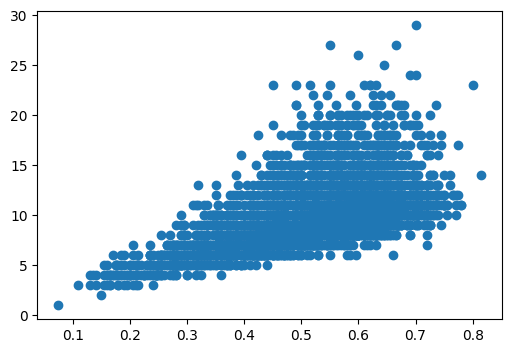

In [21]:
plt.figure(figsize=(6,4))

plt.scatter(df.length, df.rings);

In [22]:
# Чем старше ушко, тем большую длину оно имеет
np.corrcoef(df.length, df.rings)[0][1]

0.5567195769296179

###Diameter

Какой диаметр самый большой? А самый маленький?

In [23]:
df.diameter.min(), df.diameter.max()

(0.055, 0.65)

Посмотрим как диаметр влияет на возраст

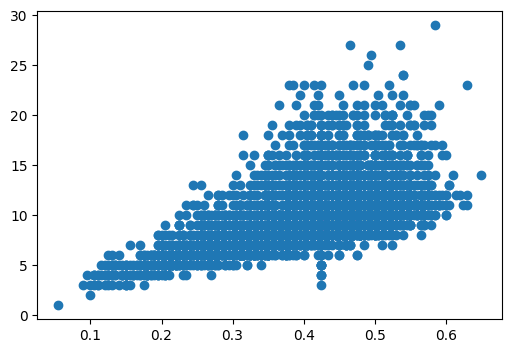

In [24]:
plt.figure(figsize=(6,4))

plt.scatter(df.diameter, df.rings);

In [25]:
# Чем старше ушко, тем большую длину оно имеет
np.corrcoef(df.diameter, df.rings)[0][1]

0.5635124396671253

In [26]:
# Длина и диаметр - во многом схожие параметры, отсюда сильно коррелируют между собой.
# Это нужно учитывать при прогнозировании. Например, линейные модели уязвимы перед мультиколлинеарностью.
np.corrcoef(df.diameter, df.length)[0][1]

0.9746930931764386

###Height

Какой рост имеет самое большое ушко? А самое маленькое?

In [27]:
df.height.min(), df.height.max()

(0.0, 1.13)

Посмотрим как рост влияет на возраст

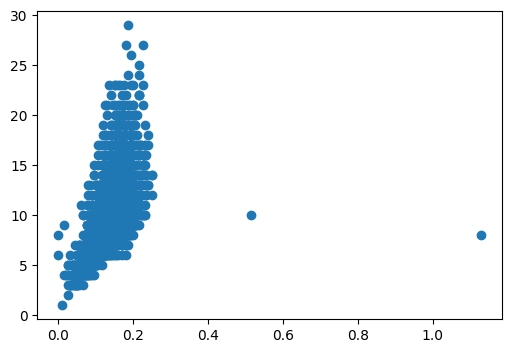

In [28]:
plt.figure(figsize=(6,4))

plt.scatter(df.height, df.rings);

In [29]:
# Наблюдаются 2 явных "ушка-переростка". В остальном же, как правило, не смотря на возраст, длина ушек не превышает 0.25.
np.corrcoef(df.height, df.rings)[0][1]

0.5574673244580375

###Whole weight

Какой вес имеет самое упитанное ушко? А самое стройное?

In [30]:
df.whole_weight.min(), df.whole_weight.max()

(0.002, 2.8255)

Посмотрим как вес всего ушка влияет на возраст

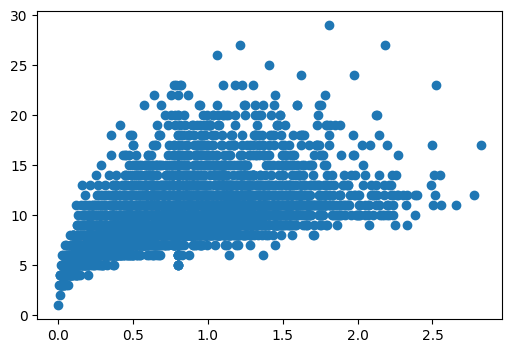

In [31]:
plt.figure(figsize=(6,4))

plt.scatter(df.whole_weight, df.rings);

In [32]:
# Чем старше ушко, тем больше общий вес.
np.corrcoef(df.whole_weight, df.rings)[0][1]

0.5321491188953758

###Shucked weight

Какой вес имеет обитатель раковины без самой раковины?

In [33]:
df.shucked_weight.min(), df.shucked_weight.max()

(0.001, 1.488)

Посмотрим как вес всего ушка влияет на возраст

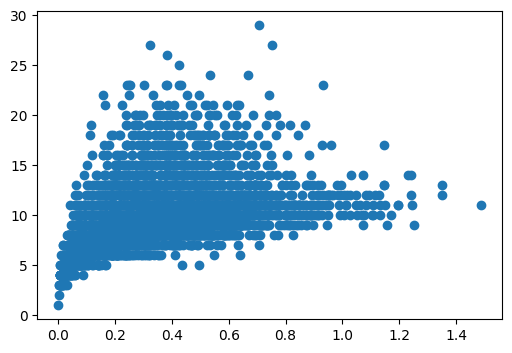

In [34]:
plt.figure(figsize=(6,4))

plt.scatter(df.shucked_weight, df.rings);

In [35]:
# Чем старше ушко, тем больше вес.
np.corrcoef(df.shucked_weight, df.rings)[0][1]

0.42088365794521443

###Viscera weight

Каков вес внутренних органов?

In [36]:
df.viscera_weight.min(), df.viscera_weight.max()

(0.0005, 0.76)

Посмотрим как вес всего ушка влияет на возраст

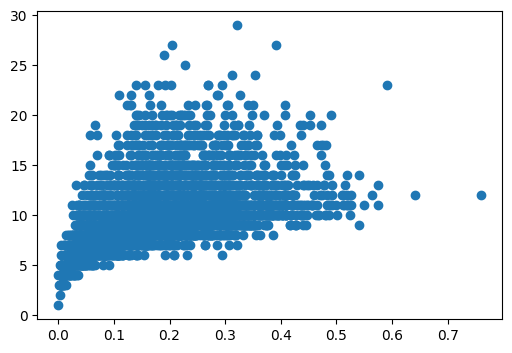

In [37]:
plt.figure(figsize=(6,4))

plt.scatter(df.viscera_weight, df.rings);

In [38]:
# Чем старше ушко, тем больше вес.
np.corrcoef(df.viscera_weight, df.rings)[0][1]

0.5038192487597714

###Shell weight

Какой вес у самой легкой и у самой тяжелой ракушки?

In [39]:
df.shell_weight.min(), df.shell_weight.max()

(0.0015, 1.005)

Посмотрим как вес всего ушка влияет на возраст

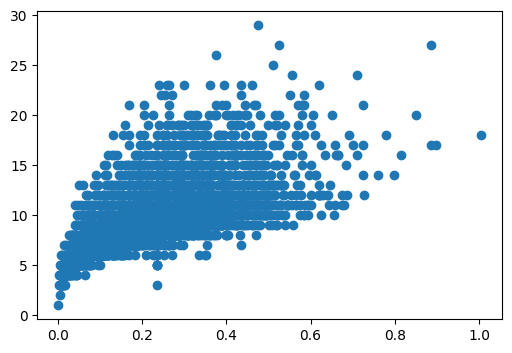

In [40]:
plt.figure(figsize=(6,4))

plt.scatter(df.shell_weight, df.rings);

In [41]:
# Чем старше ушко, тем больше вес.
np.corrcoef(df.shell_weight, df.rings)[0][1]

0.6221938268476636

Даже невооруженных глазом видно, что все переменные имеющие отношение к весу, сильно коррелируют между собой. Это тоже нужно учитывать при выборе алгоритма.

##Взаимозависимость в данных

### 1. Корреляция

**Корреляция Пирсона**

pearson.svg

Корреляция Пирсона - это мера линейной взаимосвязи двух числовых столбцов.

* $r$	=	correlation coefficient
* $x_{i}$	=	values of the x-variable in a sample
* $\bar{x}$	=	mean of the values of the x-variable
* $y_{i}$	=	values of the y-variable in a sample
* $\bar{y}$	=	mean of the values of the y-variable

<ipython-input-42-2aba822ade4c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr() # матрица корреляций


<Axes: >

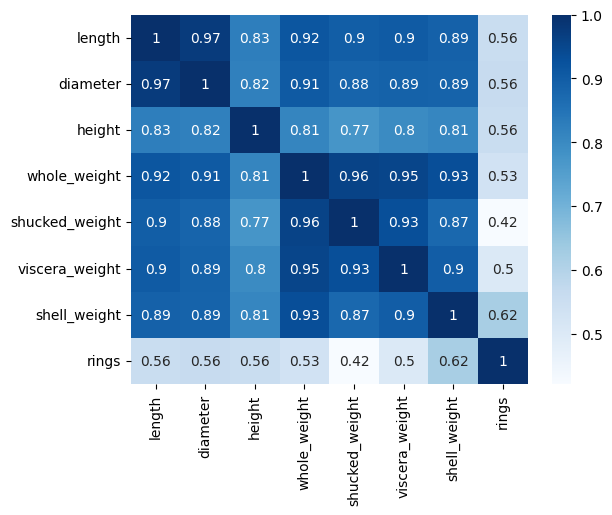

In [42]:
corr = df.corr() # матрица корреляций

sns.heatmap(corr, cmap="Blues", annot=True)

**Корреляция Спирмена**

Коэффициент корреляции Спирмена основан на ранжировании значений переменных и измеряет степень монотонной связи между ними.

Значение коэффициента корреляции Спирмена лежит в диапазоне от -1 до 1. Значение -1 означает полную отрицательную связь (чем больше одна переменная, тем меньше другая), значение 1 означает положительную связь (чем больше одна переменная, тем больше другая), а значение 0 означает отсутствие связи между переменными.

Можно использовать для порядковых переменных!

spearman.svg

* $\rho$	=	Spearman's rank correlation coefficient
* $d_{i}$	=	difference between the two ranks of each observation
* $n$	=	number of observations

[Пример расчета коэффициента корреляции Спирмена](https://statpsy.ru/spearman/primer-raschet-spearman/)

<ipython-input-43-710ca9ba2aa0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='spearman')


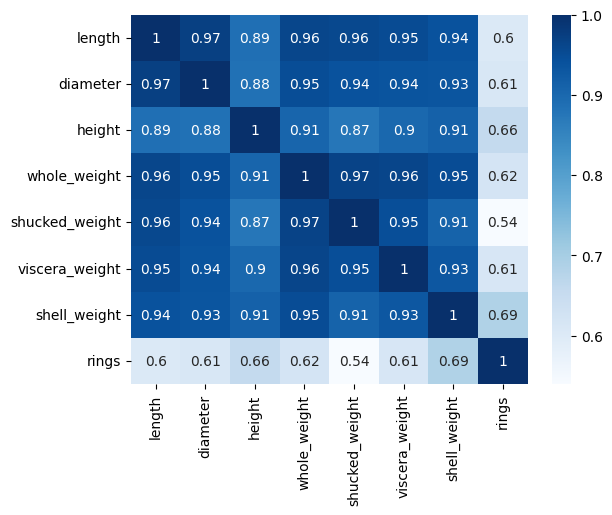

In [43]:
corr = df.corr(method='spearman')

sns.heatmap(corr, cmap="Blues", annot=True);

**Корреляция Кендалла**

Чаще используется для пары номинальный - номинальный признак.

Похожа на корреляцию Спирмена.

<ipython-input-44-5b8176fa1dc9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='kendall')


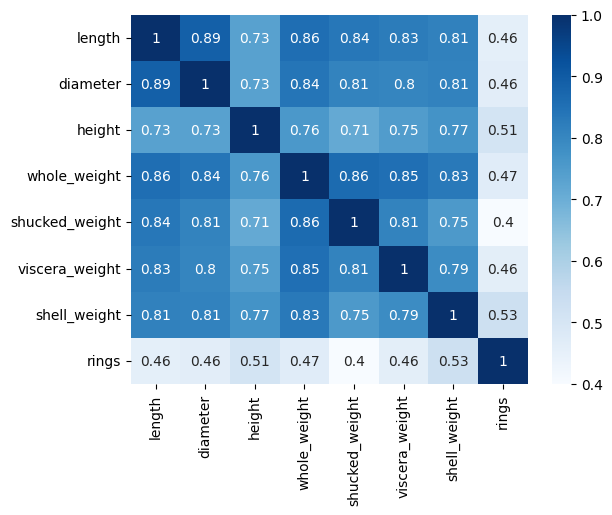

In [44]:
corr = df.corr(method='kendall')

sns.heatmap(corr, cmap="Blues", annot=True);

### 2. V-мера Крамера

*Для измерения связи между Категориальным - Категориальным признаком*

В данном датасете у нас всего одна категориальная переменная.

### 3. ANOVA

*Для измерения связи между Числовым - Категориальным признаком*

ANOVA (англ. Analysis of Variance) - это статистический метод, используемый для сравнения средних значений между тремя и более группами. ANOVA анализирует различия между средними значениями внутри групп и между группами, чтобы определить, есть ли статистически значимые различия между ними.

ANOVA основан на предположении, что переменная, которая анализируется, является нормально распределенной в каждой группе, и что дисперсия внутри групп равномерна. В результате, ANOVA проверяет, насколько различны средние значения между группами по сравнению со случайной вариацией внутри групп.

ANOVA производит F-тест, который сравнивает дисперсию между группами с дисперсией внутри групп. Если различия между группами значительны по сравнению со случайной вариацией внутри групп, то F-тест покажет статистически значимый результат, указывающий на наличие различий между группами.

In [45]:
# f_oneway() function takes the group data as input and
# returns F-statistic and P-value

from scipy.stats import f_oneway

# Running the one-way anova test between rings and sex
# Assumption(H0) is that sex and rings are NOT correlated

# Finds out the rings data for each sex as a list
sex_data = df[['sex', 'rings']]
CategoryGroupLists = sex_data.groupby('sex')['rings'].apply(list)

# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value >= 0.05

AnovaResults = f_oneway(*CategoryGroupLists)

print('P-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')

P-Value for Anova is:  2.35303895865748e-182
Features are correlated


In [46]:
Data = []

for c1 in df.columns:
    for c2 in df.columns:
        if df[c1].dtype == 'object' and df[c2].dtype != 'object':
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,sex,length,Yes
1,sex,diameter,Yes
2,sex,height,Yes
3,sex,whole_weight,Yes
4,sex,shucked_weight,Yes
5,sex,viscera_weight,Yes
6,sex,shell_weight,Yes
7,sex,rings,Yes


## Анализ распределения столбцов (целевой переменной)

<Axes: xlabel='rings', ylabel='Count'>

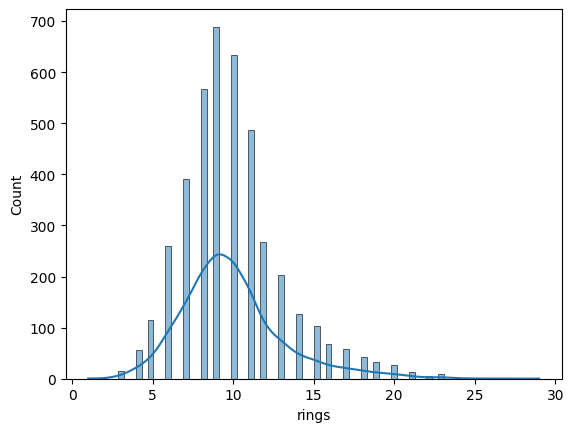

In [47]:
sns.histplot(data = df['rings'], kde = True)

Распределение близко к нормальному. Но есть небольшой хвост из ушек в преклонном возрасте, который может быть трудно прогнозируем моделями (так как там мало значений). Однако доля таких старожилов, чей возраст превышает 20 лет составляет менее 1% от общей выборки.

In [54]:
df.query('rings > 20')['rings'].count()/df.shape[0]*100

0.861862580799617

Обучим линейную регрессию предсказывать возраст по весу ракушки.

In [55]:
X = df[['shell_weight']] # матрица объект-признак
y = df['rings'] # целевая переменная

In [56]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

pred = lr.predict(X)

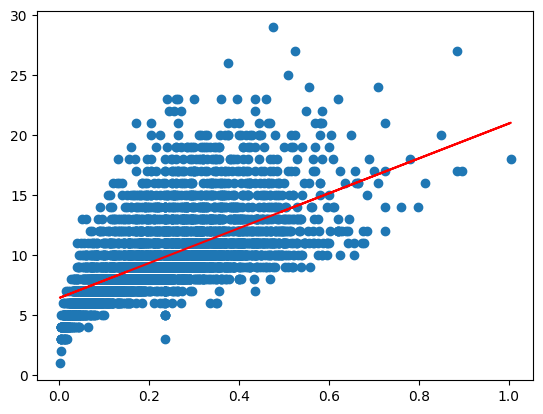

In [57]:
plt.scatter(X.values, y)
plt.plot(X.values, pred, c='red')

Вычислим ошибку модели

$$MAE = \frac1l\sum_{i=1}^l |a(x_i)-y_i|$$

In [58]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, pred)

1.8381507644109205

In [59]:
np.mean(y)

9.933684462532918

In [60]:
mean_absolute_error(y[y <= 20], pred[y <= 20])

1.7693892732822394

In [61]:
mean_absolute_error(y[y > 20], pred[y > 20])

9.747632285629491

Действительно ошибка на более возрастных ушках выше (разница в 5,5 раз).

## Polars

Увеличим наш датасет до 1_000_000 строк и проведем сравнение скорости работы Pandas и Polars на увеличенном датасете.

In [64]:
df_big = df.copy()

for i in range(240):
  df_big = pd.concat([df_big, df])

df_big.to_csv("abalone_big.csv", index=False)

In [65]:
df_big.shape, df.shape

((1006657, 9), (4177, 9))

In [66]:
!pip install polars

import polars as pl

print(pl.__version__)

0.17.3


### Загрузка данных

Здесь Polars немного опережает Pandas.

In [67]:
%%time

df_pl = pl.read_csv("abalone_big.csv")

CPU times: user 764 ms, sys: 128 ms, total: 892 ms
Wall time: 1.02 s


In [68]:
%%time

df = pd.read_csv("abalone_big.csv")

CPU times: user 1.18 s, sys: 84 ms, total: 1.26 s
Wall time: 1.66 s


### Выбор и фильтрация данных

При простом выводе нескольких колонок разницы по времени выполнения почти нет. Однако при фильтрации - Polars в 3 раза быстрее.

In [69]:
%%time

df[['length', 'height']]

CPU times: user 6.69 ms, sys: 2.02 ms, total: 8.71 ms
Wall time: 10 ms


,length,height
0,0.455,0.095
1,0.350,0.090
2,0.530,0.135
3,0.440,0.125
4,0.330,0.080
...,...,...
1006652,0.565,0.165
1006653,0.590,0.135
1006654,0.600,0.205
1006655,0.625,0.150


In [70]:
%%time

df_pl[['length', 'height']]

# df_pl.select(pl.col(['length', 'height']))

CPU times: user 442 µs, sys: 977 µs, total: 1.42 ms
Wall time: 10.4 ms


length,height
f64,f64
0.455,0.095
0.35,0.09
0.53,0.135
0.44,0.125
0.33,0.08
0.425,0.095
0.53,0.15
0.545,0.125
0.475,0.125


In [71]:
# Pandas
%%time

df.query('diameter > 0.15')

CPU times: user 78.9 ms, sys: 21.5 ms, total: 100 ms
Wall time: 380 ms


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.7985,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
1006652,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
1006653,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
1006654,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
1006655,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [72]:
# Polars
%%time

df_pl.filter(pl.col('diameter') > 0.15)

CPU times: user 34.4 ms, sys: 48.6 ms, total: 82.9 ms
Wall time: 116 ms


sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""M""",0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
"""M""",0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
"""F""",0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
"""M""",0.44,0.365,0.125,0.7985,0.2155,0.114,0.155,10
"""I""",0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7
"""I""",0.425,0.3,0.095,0.3515,0.141,0.0775,0.12,8
"""F""",0.53,0.415,0.15,0.7775,0.237,0.1415,0.33,20
"""F""",0.545,0.425,0.125,0.768,0.294,0.1495,0.26,16
"""M""",0.475,0.37,0.125,0.5095,0.2165,0.1125,0.165,9


In [73]:
%%time

df[(df.sex == 'F') & (df.rings > 10)]

CPU times: user 95.5 ms, sys: 0 ns, total: 95.5 ms
Wall time: 94.9 ms


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19
10,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.2100,14
22,F,0.565,0.440,0.155,0.9395,0.4275,0.2140,0.2700,12
...,...,...,...,...,...,...,...,...,...
1006621,F,0.650,0.505,0.165,1.3570,0.5725,0.2810,0.4300,11
1006623,F,0.655,0.425,0.220,1.3590,0.6420,0.3255,0.4050,13
1006640,F,0.585,0.475,0.165,1.0530,0.4580,0.2170,0.3000,11
1006641,F,0.585,0.455,0.170,0.9945,0.4255,0.2630,0.2845,11


In [74]:
%%time

df_pl.filter((pl.col('sex') == 'F') & (pl.col('rings') > 10))

CPU times: user 39.8 ms, sys: 2.72 ms, total: 42.5 ms
Wall time: 35.3 ms


sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""F""",0.53,0.415,0.15,0.7775,0.237,0.1415,0.33,20
"""F""",0.545,0.425,0.125,0.768,0.294,0.1495,0.26,16
"""F""",0.55,0.44,0.15,0.8945,0.3145,0.151,0.32,19
"""F""",0.525,0.38,0.14,0.6065,0.194,0.1475,0.21,14
"""F""",0.565,0.44,0.155,0.9395,0.4275,0.214,0.27,12
"""F""",0.56,0.44,0.14,0.9285,0.3825,0.188,0.3,11
"""F""",0.58,0.45,0.185,0.9955,0.3945,0.272,0.285,11
"""F""",0.68,0.56,0.165,1.639,0.6055,0.2805,0.46,15
"""F""",0.665,0.525,0.165,1.338,0.5515,0.3575,0.35,18


### Агрегация данных

Polars снова немного быстрее, но разница не столь существенна. При чем если использовать ленивые вычисления в Polars - скорость работы еще вырастает.

In [75]:
%%time

df.groupby('sex').agg({'shell_weight' : 'mean', 'rings' : 'max'})

CPU times: user 79 ms, sys: 8.95 ms, total: 88 ms
Wall time: 88.4 ms


,shell_weight,rings
sex,,
F,0.294600,29
I,0.129879,21
M,0.279422,27


In [76]:
%%time

df_pl.groupby('sex').agg([pl.mean('shell_weight'), pl.max('rings')])

CPU times: user 77.5 ms, sys: 0 ns, total: 77.5 ms
Wall time: 63.1 ms


sex,shell_weight,rings
str,f64,i64
"""F""",0.2946,29
"""M""",0.279422,27
"""I""",0.129879,21


In [77]:
# lazy operations
%%time

q = (
    df_pl
    .lazy()
    .groupby(by='sex')
    .agg(
        [
            pl.col('shell_weight').mean(),
            pl.col('rings').max()
        ]
    )
)

CPU times: user 197 µs, sys: 0 ns, total: 197 µs
Wall time: 203 µs


In [79]:
%%time

q.collect()

CPU times: user 71.3 ms, sys: 0 ns, total: 71.3 ms
Wall time: 51.8 ms


sex,shell_weight,rings
str,f64,i64
"""M""",0.279422,27
"""F""",0.2946,29
"""I""",0.129879,21
